In [ ]:
#librairie 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("dataset_jeux_par_item V2.csv")
df.head(10)

,jeu,Genre,nom_plateforme,nom_fabricant,editeur,developpeur,annee,ttl_sales,dev_country,metacritic_summary,...,igdb_age_rating_category,igdb_age_rating_class,igdb_developer_name,igdb_developer_country,igdb_publisher_name,igdb_publisher_country,igdb_websites_category,igdb_websites_url,twitch_id,twitch_streams_count
0,Wii Sports,Sports,Wii,Nintendo,Nintendo,NINTENDO,2006.0,82.90,Japan,Tennis (1-4 players): Players grab the control...,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_7, CLASS_IND_10, CERO_B, USK_12, ...",Nintendo EAD Software Development Group No.2,Japan,Nintendo,Japan,"official, wikipedia, wikia, twitch","http://wiisports.nintendo.com/, https://en.wik...",12232.0,1.0
1,Mario Kart 8 Deluxe,Racing,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2017.0,48.41,Japan,Race and battle your friends in the definitive...,...,"ESRB, PEGI, USK, CLASS_IND, CERO, GRAC, ACB","ESRB_E, PEGI_3, USK_0, CLASS_IND_10, CERO_A, G...",Nintendo EPD,Japan,"Nintendo of America, Nintendo of Europe","United States of America, Germany","wikia, wikipedia, official, twitch, reddit","https://www.mariowiki.com/Mario_Kart_8_Deluxe,...",941530474.0,670.0
2,Super Mario Bros.,Platform,Nintendo (NES),Nintendo,Nintendo,NINTENDO,1985.0,40.24,Japan,NaN,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_3, CLASS_IND_10, CERO_A, USK_0, G...","Nintendo, Nintendo EAD, Nintendo R&D4",Japan,Nintendo,Japan,"wikipedia, wikia, twitch, youtube, facebook, t...",https://en.wikipedia.org/wiki/List_of_Game_%26...,509508.0,13.0
3,Animal Crossing: New Horizons,Simulation,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2020.0,40.17,Japan,If the hustle and bustle of modern life’s got ...,...,"ESRB, PEGI, USK, CERO","ESRB_E, PEGI_3, USK_0, CERO_A","Nintendo EPD, Nintendo",Japan,Nintendo,Japan,"official, wikia, wikipedia, twitter, reddit, d...",https://www.nintendo.com/games/detail/animal-c...,509538.0,1655.0
4,Counter-Strike: Global Offensive,Shooter,Microsoft Windows,PC,Valve,VALVE,2012.0,40.00,United States,Counter-Strike: Global Offensive features new ...,...,"ESRB, PEGI, USK, CLASS_IND, ACB","ESRB_M, PEGI_18, USK_18, CLASS_IND_16, ACB_R18","Hidden Path Entertainment, Valve",United States of America,Valve,United States of America,"official, wikia, wikipedia, facebook, youtube,...","http://blog.counter-strike.net/, http://counte...",32399.0,24977.0
5,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo,NINTENDO,2008.0,37.38,Japan,Mario Kart Wii comes with the intuitive Wii Wh...,...,"ESRB, PEGI, CLASS_IND, CERO, ACB","ESRB_E, PEGI_3, CLASS_IND_10, CERO_A, ACB_PG","Nintendo, Nintendo EAD",Japan,Nintendo,Japan,"wikipedia, wikia, official, twitch","https://en.wikipedia.org/wiki/Mario_Kart_Wii, ...",18871.0,193.0
6,PLAYERUNKNOWN'S BATTLEGROUNDS,Shooter,Microsoft Windows,PC,PUBG Corporation,PUBG CORPORATION,2017.0,36.60,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Minecraft,Misc,Microsoft Windows,PC,Mojang,MOJANG,2010.0,33.15,Sweden,The game involves players creating and destroy...,...,"ESRB, PEGI, CERO, USK, CLASS_IND, ACB, GRAC","ESRB_E10, PEGI_7, CERO_A, USK_6, CLASS_IND_10,...",Mojang Studios,Sweden,Mojang Studios,Sweden,"official, wikipedia, facebook, twitter, youtub...","https://minecraft.net/, https://en.wikipedia.o...",27471.0,49502.0
8,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo,NINTENDO,2009.0,33.14,Japan,Wii Sports Resort is a collection of fun sport...,...,"ESRB, PEGI, CLASS_IND, CERO, USK, ACB, GRAC","ESRB_E, PEGI_7, CLASS_IND_10, CERO_B, USK_12, ...",Nintendo EAD Software Development Group No.2,Japan,Nintendo,Japan,"official, wikipedia, wikia, twitch","http://www.wiisportsresort.com/, https://en.wi...",19259.0,7.0
9,Pokemon Red / Green / Blue Version,Role-Playing,Game Boy,Nintendo,Nintendo,GAME FREAK,1998.0,31.38,Japan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import nltk
nltk.download('punkt')
#tokenisation de la colonne Jeu ( division des entrées de la colonne jeu en mots=tokens)
from nltk.tokenize import word_tokenize

def tokenize_commentaire(jeu):
    return word_tokenize(jeu)

# Appliquer la fonction de tokenisation à chaque élément de la colonne
df["jeu_tokenized"] = df["jeu"].apply(tokenize_commentaire)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['jeu_tokenized']

0                                            [Wii, Sports]
1                                 [Mario, Kart, 8, Deluxe]
2                                  [Super, Mario, Bros, .]
3                     [Animal, Crossing, :, New, Horizons]
4                   [Counter-Strike, :, Global, Offensive]
                               ...                        
20460       [Tokyo, Yamanote, Boys, for, V, :, Main, Disc]
20461                                             [Asylum]
20462    [NadePro, !, !, Kisama, no, Seiyuu, Yatte, Mir...
20463                                        [Pac, Attack]
20464                   [Worms, :, The, Director, 's, Cut]
Name: jeu_tokenized, Length: 20465, dtype: object

In [ ]:
#librairies
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


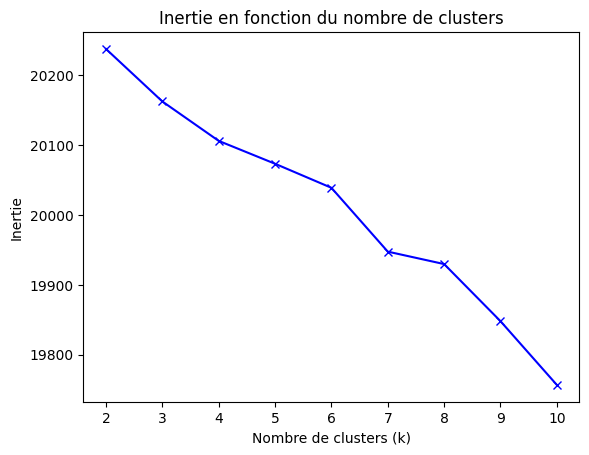

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

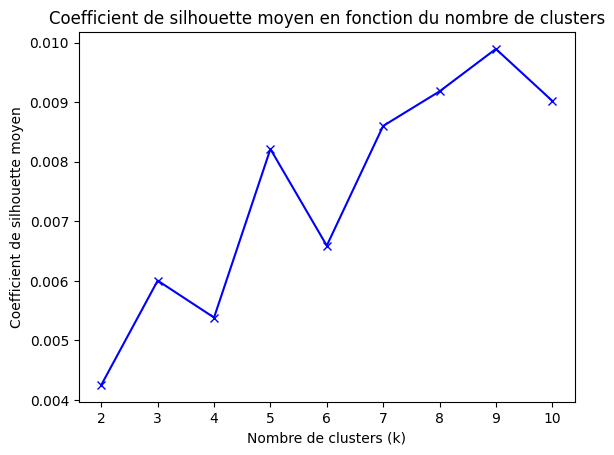

In [ ]:
# Convertion des tokens en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["jeu_tokenized"].apply(lambda x: " ".join(x)))
k_values = range(2, 11)

# Liste des valeurs d'inertie
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Traçage du graphique d'inertie
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel("Inertie")
plt.title("Inertie en fonction du nombre de clusters")
plt.show()
# Liste des valeurs de coefficient de silhouette moyen
silhouette_avgs = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avgs.append(silhouette_score(X, labels))

# Traçage du graphique de coefficient de silhouette moyen
plt.plot(k_values, silhouette_avgs, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel("Coefficient de silhouette moyen")
plt.title("Coefficient de silhouette moyen en fonction du nombre de clusters")
plt.show()

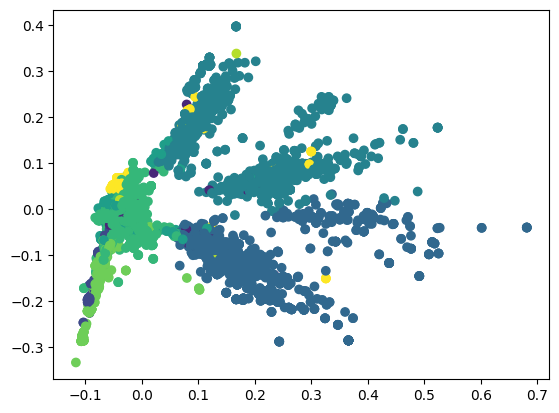

In [ ]:
#représentation graphique après réduction de dimensionnalité : 
# Réduire la dimensionnalité des données avec PCA 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.toarray())
#affichage graphique 
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_)
plt.show()

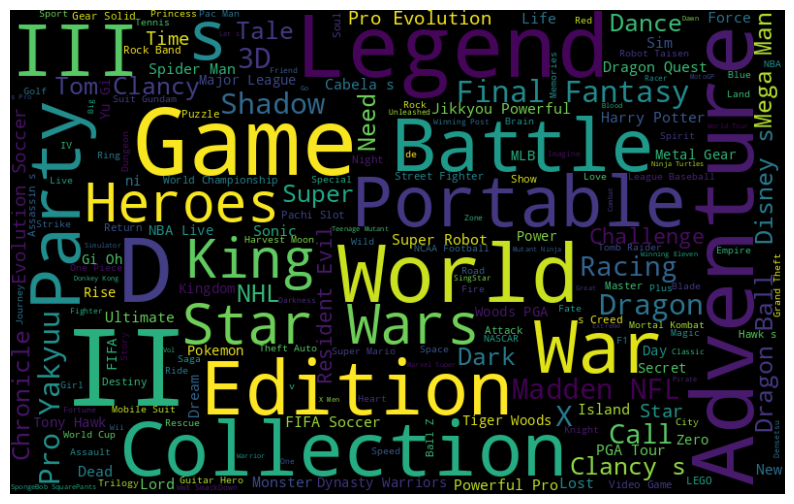

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création d'une liste de tous les mots tokenisés
all_words = [word for tokens in df["jeu_tokenized"] for word in tokens]

# Convertion de la liste de mots en une chaîne de caractères
all_words = " ".join(all_words)

# Génération du nuage de mots
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Affichage du nuage de mots
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()